In [66]:
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import gco

In [67]:
def dist(patch1, patch2):
    pixel_count = patch1.size
    _patch1 = patch1.flatten()
    _patch2 = patch2.flatten()
    value = 0.0
    for i in range(pixel_count):
        value += abs(float(_patch1[i]) - float(_patch2[i]))
    return value / pixel_count


#=======================================================

leftImg = cv.imread('data/im2.png')
rightImg = cv.imread('data/im6.png')

leftImg = cv.cvtColor(leftImg, cv.COLOR_BGR2RGB)
rightImg = cv.cvtColor(rightImg, cv.COLOR_BGR2RGB)
newImg = leftImg

num_label = 65

H = leftImg.shape[0]  #height of img
W = leftImg.shape[1]  #width of img

unary = np.zeros([H, W, num_label])
pairwise = (1 - np.eye(num_label))

for y in range(0, H):
    for x in range(0, W):
        for i in range(0, num_label):
            c1 = leftImg[y][x]
            if (x - i) >= 0:
                c2 = rightImg[y][x - i]
            elif (x - i) < 0:
                c2 = rightImg[y][0]
            unary[y][x][i] = dist(c1, c2) / 255


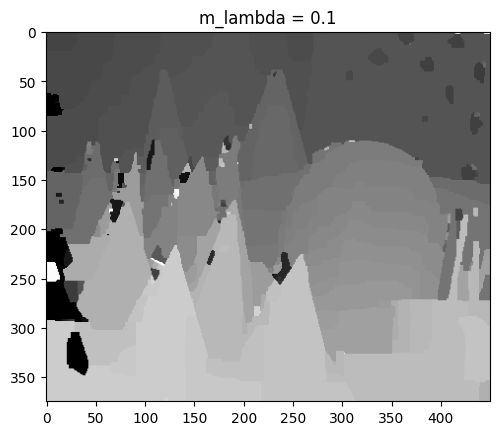

In [68]:
m_lambda = 0.1
n_labels = gco.cut_grid_graph_simple(unary, pairwise * m_lambda, connect=4, n_iter=-1)
n_labels = n_labels.reshape(H, W)

plt.imshow(n_labels, cmap='gray')
plt.title(f'm_lambda = {m_lambda}')
plt.show()

# There is some noise in the depth result.
# 
# This is because in graphic cutting, the constraints of pv and pc are simple and less, which means that we can't get the best results.

# The best result is when lambda=0.2.
# We can find that when increasing the value of lambda, the depth map will become more smooth. Besides, compared to the groundtruth depth map, the left side of my depth map have some black regions. The reason is that my code caculate the depth map of the left images by the right image. While the right image do not have the information of the left side.
# The value of lambde is the weighting factor of the prior term, and in this part I just change is as a constant. When we caculate lambda dependent on x, the result will be better.

# One exception is that I set lambda in a small scale, the cut_grid_graph_simple will cause kernel restart. I don't know why this happens. And I set algorithm='swap' in the cut_grid_graph_simple, then it will be ok.

In [69]:
# pairwise2 = np.zeros([num_label, num_label])
# for i in range(num_label):
#     for j in range(num_label):
#         pairwise2[i, j] = abs(i - j)
# 
# # m_lambda = 0.1
# n_labels = pygco.cut_grid_graph_simple(unary, pairwise2 * 0.01, connect=6, n_iter=-1, algorithm='swap')
# n_labels = n_labels.reshape(H, W)
# 
# plt.imshow(n_labels, cmap='gray')
# plt.title(f'm_lambda = {m_lambda}')
# plt.show()